# Linear Regression using TensorFlow

## Import the necessary libraries

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

## Fetch the data (here california housing dataset is used)

In [39]:
housing = fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

## Data Preprocessing

### Splitting the full data into train and test

In [42]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train_full, X_test, y_train_full, y_test

(array([[   3.8056    ,   29.        ,    6.39130435, ...,    3.10724638,
           36.83      , -119.91      ],
        [   3.1597    ,   30.        ,    6.09777778, ...,    4.65333333,
           34.08      , -117.62      ],
        [   3.5221    ,   52.        ,    4.8340081 , ...,    2.18218623,
           37.78      , -122.47      ],
        ...,
        [   1.7714    ,   27.        ,    2.5325    , ...,    2.6675    ,
           33.9       , -118.29      ],
        [   1.7038    ,   13.        ,    2.61583578, ...,    3.16422287,
           34.04      , -118.27      ],
        [   4.9312    ,   46.        ,    6.05238095, ...,    2.72857143,
           34.2       , -118.13      ]]),
 array([[   3.8292    ,   36.        ,    6.69498069, ...,    2.33204633,
           34.15      , -117.28      ],
        [   6.7172    ,    3.        ,   11.28738318, ...,    2.91705607,
           33.98      , -117.76      ],
        [   4.3056    ,   39.        ,    5.90797546, ...,    2.76278119,

### Splitting the training data 

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
X_train, X_valid, y_train, y_valid

(array([[   1.5625    ,   36.        ,    5.20320856, ...,    3.27807487,
           35.34      , -119.01      ],
        [   5.8972    ,   35.        ,    5.6635514 , ...,    2.65732087,
           33.83      , -118.34      ],
        [   2.9081    ,   36.        ,    5.09502262, ...,    2.52714932,
           36.77      , -119.82      ],
        ...,
        [   2.4196    ,   41.        ,    6.80701754, ...,    2.78362573,
           36.95      , -120.08      ],
        [   4.2222    ,   18.        ,    6.43631436, ...,    2.8401084 ,
           34.64      , -120.08      ],
        [   4.8405    ,   17.        ,    6.03267974, ...,    2.7486174 ,
           37.43      , -122.43      ]]),
 array([[   2.4022    ,   47.        ,    4.74184783, ...,    2.93206522,
           34.01      , -118.32      ],
        [   6.2917    ,   39.        ,    5.31280389, ...,    2.14100486,
           34.02      , -118.44      ],
        [   1.5625    ,   33.        ,    3.62345679, ...,    4.50617284,

## Dimensionality Reduction using transform and fit transform

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.19722993,  0.58122344, -0.09642657, ...,  0.0137734 ,
        -0.13531396,  0.27780627],
       [ 1.0469434 ,  0.50142962,  0.11328139, ..., -0.03461135,
        -0.8422334 ,  0.6128427 ],
       [-0.50058203,  0.58122344, -0.14571039, ..., -0.04475759,
         0.5341528 , -0.12723778],
       ...,
       [-0.75348965,  0.98019256,  0.63418437, ..., -0.0247665 ,
         0.61842134, -0.25725192],
       [ 0.17975759, -0.8550654 ,  0.46531152, ..., -0.02036396,
        -0.46302496, -0.25725192],
       [ 0.49986565, -0.93485922,  0.28143683, ..., -0.02749523,
         0.84313746, -1.43237972]])

In [47]:
X_valid = scaler.transform(X_valid)
X_valid

array([[-0.76249803,  1.45895551, -0.30659823, ..., -0.01319637,
        -0.75796486,  0.62284379],
       [ 1.25118508,  0.82060491, -0.04650071, ..., -0.07485567,
        -0.75328327,  0.56283726],
       [-1.19722993,  0.34184197, -0.81607831, ...,  0.10949765,
         0.45924743,  0.01777799],
       ...,
       [-1.20416741, -1.57320982,  0.103388  , ..., -0.06194909,
        -0.70178583,  1.60795092],
       [-0.90601081,  0.98019256, -0.28802973, ...,  0.05046352,
        -0.81414389,  0.67284923],
       [-0.16395862,  1.21957404, -0.41117693, ..., -0.06670189,
        -0.68305949,  0.60784216]])

In [48]:
X_test = scaler.transform(X_test)
X_test

array([[-0.02370749,  0.58122344,  0.58314628, ..., -0.05996492,
        -0.69242266,  1.14290035],
       [ 1.47147616, -2.05197277,  2.67520308, ..., -0.01436626,
        -0.77200962,  0.90287424],
       [ 0.22293568,  0.82060491,  0.22462813, ..., -0.02639124,
         1.20361956, -1.54739223],
       ...,
       [-0.72196033, -1.41362217,  0.53759558, ..., -0.02319731,
         2.86558249, -2.33247761],
       [ 0.03696963, -0.69547775,  1.0156198 , ...,  0.02343758,
        -0.73923852,  1.03788893],
       [-0.38906452, -0.93485922, -0.82664379, ..., -0.09736327,
        -0.7439201 ,  0.55283618]])

# Training

### Selecting the model for neural network with the activation function 

In [51]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")

C:\Users\vishe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the model 

In [53]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5338 - val_loss: 0.6084
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5602 - val_loss: 0.5310
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2506 - val_loss: 0.5301
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4670 - val_loss: 0.5288
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4421 - val_loss: 0.4697
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4254 - val_loss: 0.4671
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4266 - val_loss: 0.4813
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4207 - val_loss: 0.4435
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4023 - val_loss: 0.4434
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4110 - val_loss: 0.4355
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3777 - val_loss: 0.4303
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Evaluation

### Mean Square Error test

In [56]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4142


0.3893982768058777

### Testing for new instances

In [58]:
X_new = X_test[:3] # pretend these are new instances
X_new

array([[-0.02370749,  0.58122344,  0.58314628, -0.03527477, -0.74360987,
        -0.05996492, -0.69242266,  1.14290035],
       [ 1.47147616, -2.05197277,  2.67520308,  1.30760916,  0.99072124,
        -0.01436626, -0.77200962,  0.90287424],
       [ 0.22293568,  0.82060491,  0.22462813, -0.09485525, -0.05922248,
        -0.02639124,  1.20361956, -1.54739223]])

### Predicting for new instances

In [60]:
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[1.5952212],
       [2.9242325],
       [2.4450407]], dtype=float32)

## Finding the loss

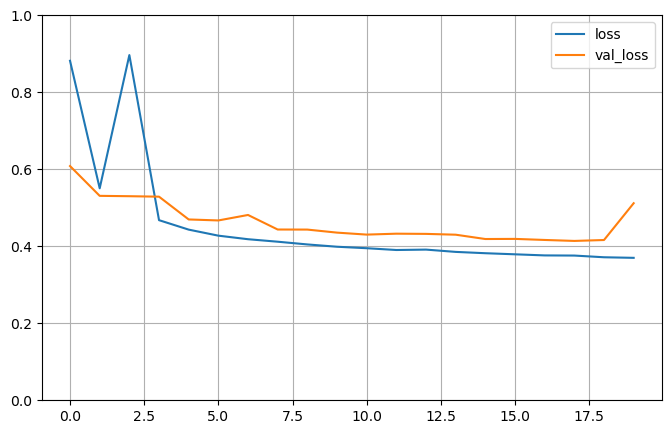

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()